In [245]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split


In [246]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [247]:
df = pd.read_csv("/content/drive/MyDrive/dataset grad/Flood Prediction Factors.csv")
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [248]:
df.shape #display the row,column count


(50000, 21)

In [249]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   MonsoonIntensity                 50000 non-null  int64  
 1   TopographyDrainage               50000 non-null  int64  
 2   RiverManagement                  50000 non-null  int64  
 3   Deforestation                    50000 non-null  int64  
 4   Urbanization                     50000 non-null  int64  
 5   ClimateChange                    50000 non-null  int64  
 6   DamsQuality                      50000 non-null  int64  
 7   Siltation                        50000 non-null  int64  
 8   AgriculturalPractices            50000 non-null  int64  
 9   Encroachments                    50000 non-null  int64  
 10  IneffectiveDisasterPreparedness  50000 non-null  int64  
 11  DrainageSystems                  50000 non-null  int64  
 12  CoastalVulnerabili

In [250]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
0,3,8,6,6,4,4,6,2,3,2,...,10,7,4,2,3,4,3,2,6,0.450
1,8,4,5,7,7,9,1,5,5,4,...,9,2,6,2,1,1,9,1,3,0.475
2,3,10,4,1,7,5,4,7,4,9,...,7,4,4,8,6,1,8,3,6,0.515
3,4,4,2,7,3,4,1,4,6,4,...,4,2,6,6,8,8,6,6,10,0.520
4,3,7,5,2,5,8,5,2,7,5,...,7,6,5,3,3,4,4,3,4,0.475


In [251]:
df.isna().sum()

MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64

In [252]:
df.duplicated().sum()

0

In [253]:
df.describe()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,DrainageSystems,CoastalVulnerability,Landslides,Watersheds,DeterioratingInfrastructure,PopulationScore,WetlandLoss,InadequatePlanning,PoliticalFactors,FloodProbability
count,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000
mean,4.991480,4.984100,5.01594,5.008480,4.989060,4.988340,5.01536,4.988600,5.006120,5.006380,...,5.006060,4.999920,4.984220,4.97982,4.988200,4.984980,5.00512,4.994360,4.990520,0.499660
std,2.236834,2.246488,2.23131,2.222743,2.243159,2.226761,2.24500,2.232642,2.234588,2.241633,...,2.238107,2.247101,2.227741,2.23219,2.231134,2.238279,2.23176,2.230011,2.246075,0.050034
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285000
25%,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.00000,3.000000,3.000000,0.465000
50%,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.00000,5.000000,5.000000,0.500000
75%,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.000000,...,6.000000,6.000000,6.000000,6.00000,6.000000,6.000000,6.00000,6.000000,6.000000,0.535000
max,16.000000,18.000000,16.00000,17.000000,17.000000,17.000000,16.00000,16.000000,16.000000,18.000000,...,17.000000,17.000000,16.000000,16.00000,17.000000,19.000000,22.00000,16.000000,16.000000,0.725000


In [254]:
corr = df.corr()

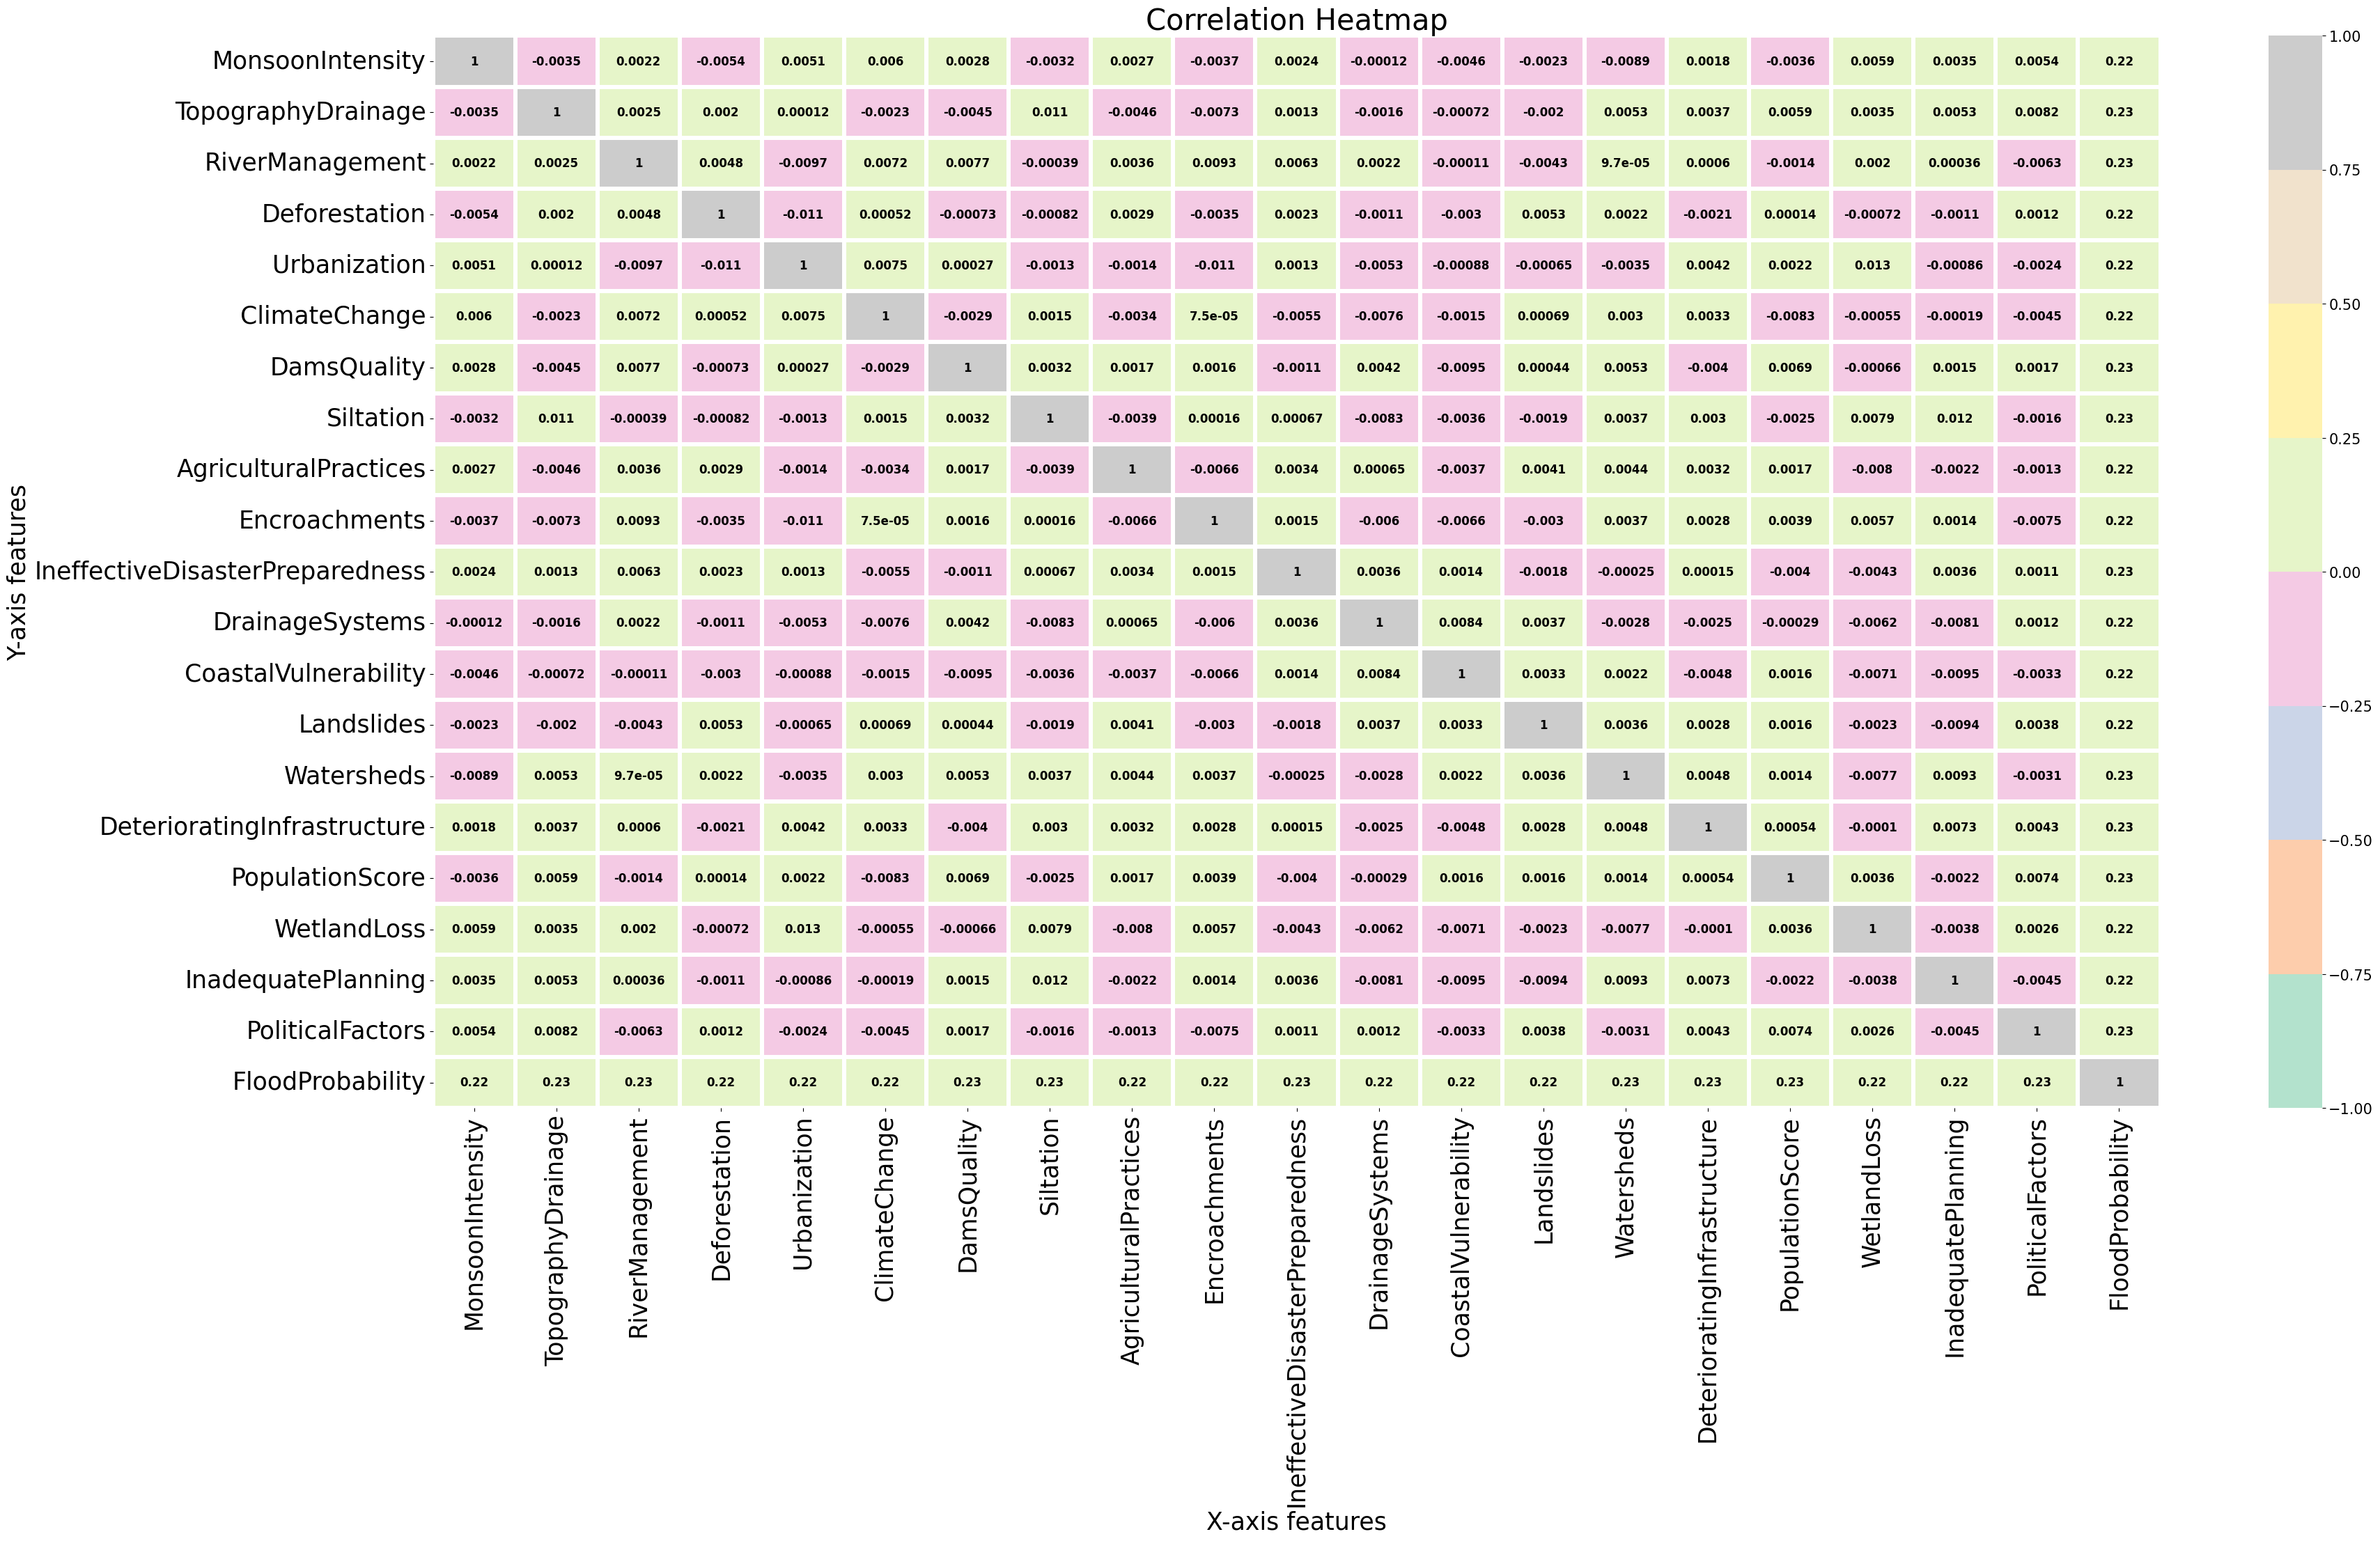

In [255]:
# Assuming 'subset_corr' is your heatmap data
plt.figure(figsize=(40, 20))  # Adjust the figure size as needed
heatmap = sns.heatmap(corr, vmin=-1, vmax=1,linewidths=4, cmap="Pastel2", annot=True, annot_kws={"color": "black", "size": 12, "fontweight": "bold"})

# Accessing the color bar axis and setting font size for color bar labels
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)  # Adjust the font size of the color bar labels

plt.xlabel("X-axis features", fontsize=25)  # Label for x-axis
plt.ylabel("Y-axis features", fontsize=25)  # Label for y-axis
plt.title("Correlation Heatmap", fontsize=30)  # Title for the heatmap

# Change the size of y-axis tick labels and x-axis tick labels
plt.yticks(fontsize=25)  # Change the font size of y-axis tick labels
plt.xticks(fontsize=25)  # Change the font size of x-axis tick labels

plt.show()


array([[<Axes: title={'center': 'MonsoonIntensity'}>,
        <Axes: title={'center': 'TopographyDrainage'}>,
        <Axes: title={'center': 'RiverManagement'}>,
        <Axes: title={'center': 'Deforestation'}>,
        <Axes: title={'center': 'Urbanization'}>],
       [<Axes: title={'center': 'ClimateChange'}>,
        <Axes: title={'center': 'DamsQuality'}>,
        <Axes: title={'center': 'Siltation'}>,
        <Axes: title={'center': 'AgriculturalPractices'}>,
        <Axes: title={'center': 'Encroachments'}>],
       [<Axes: title={'center': 'IneffectiveDisasterPreparedness'}>,
        <Axes: title={'center': 'DrainageSystems'}>,
        <Axes: title={'center': 'CoastalVulnerability'}>,
        <Axes: title={'center': 'Landslides'}>,
        <Axes: title={'center': 'Watersheds'}>],
       [<Axes: title={'center': 'DeterioratingInfrastructure'}>,
        <Axes: title={'center': 'PopulationScore'}>,
        <Axes: title={'center': 'WetlandLoss'}>,
        <Axes: title={'center': '

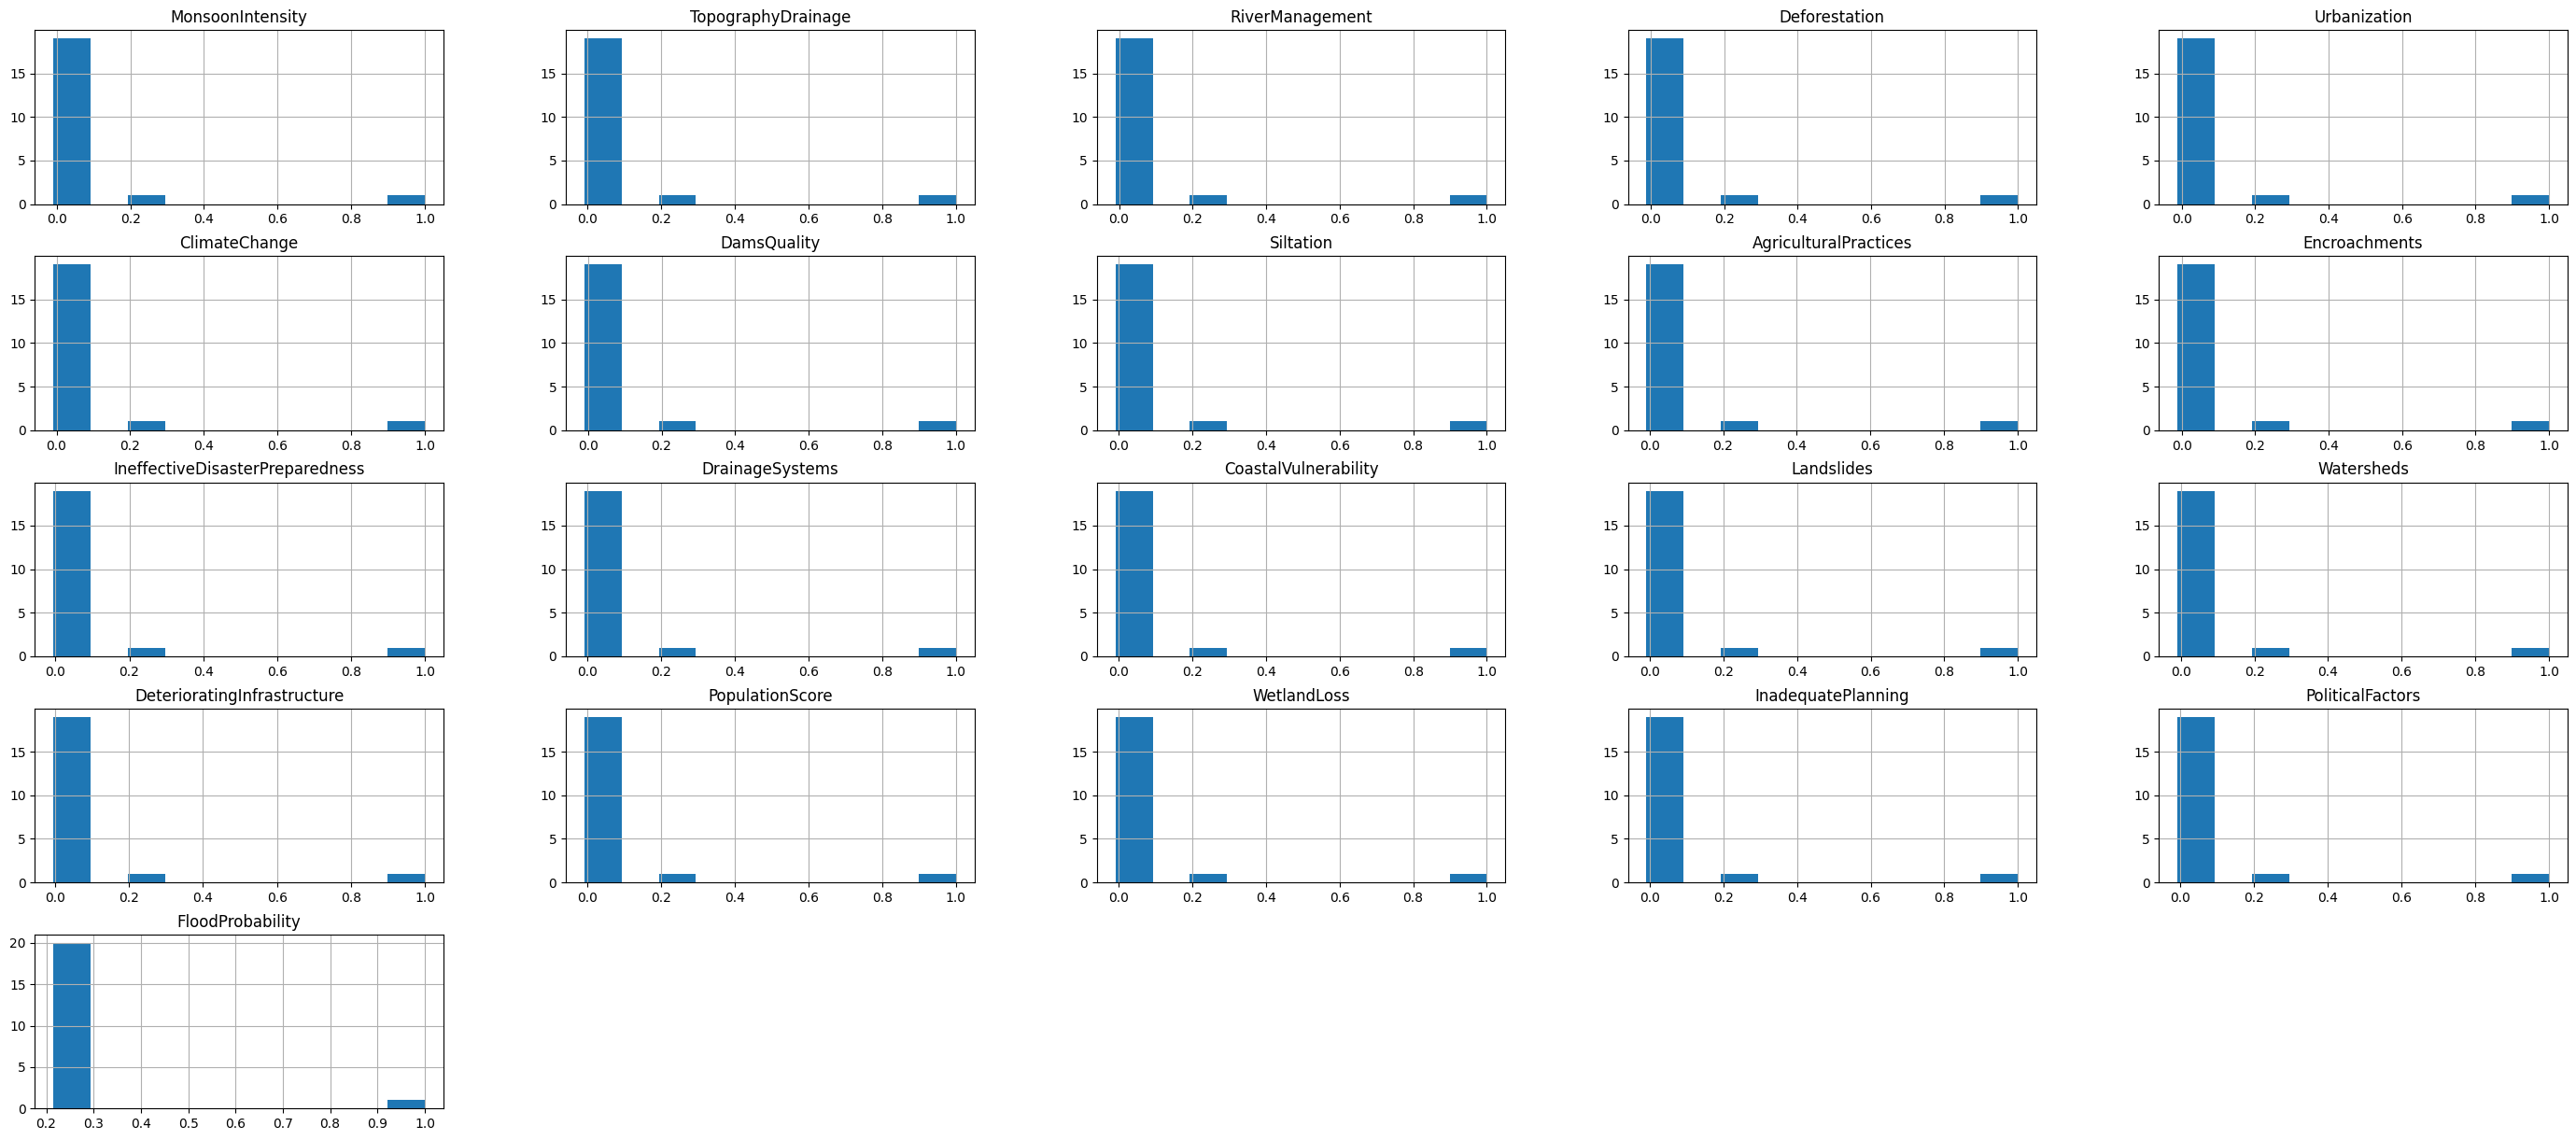

In [256]:
corr.hist(figsize=(35,15))

In [257]:
from sklearn.model_selection import train_test_split

X = df.drop('FloodProbability', axis=1)
y = df['FloodProbability']



In [258]:
# Training and testing split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(35000, 20)
(35000,)
(15000, 20)
(15000,)


# Train Models

In [259]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

In [260]:
# Instantiate models
svr_model = SVR()
dt_model = DecisionTreeRegressor()
mlp_model = MLPRegressor()
lr_model = LinearRegression()

# Train models
svr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
mlp_model.fit(X_train, y_train)
lr_model.fit(X_train, y_train)


LinearRegression()

# Prediction for all models

In [261]:
# Predictions
svr_preds = svr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
mlp_preds = mlp_model.predict(X_test)
lr_preds = lr_model.predict(X_test)

# Evaluate Models

In [262]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"{name} Model:")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print(f"Root Mean Squared Error: {rmse}")
    print(f"R^2 Score: {r2}")
    print("_________________________________________________")

In [263]:
# Evaluate each model
evaluate_model("SVR", y_test, svr_preds)
evaluate_model("Decision Tree", y_test, dt_preds)
evaluate_model("MLP", y_test, mlp_preds)
evaluate_model("Linear Regression", y_test, lr_preds)

SVR Model:
Mean Absolute Error: 0.020730509389146952
Mean Squared Error: 0.0007327941140115345
Root Mean Squared Error: 0.02707017018807851
R^2 Score: 0.7079190389859668
_________________________________________________
Decision Tree Model:
Mean Absolute Error: 0.03735466666666667
Mean Squared Error: 0.0022186566666666666
Root Mean Squared Error: 0.04710261846932362
R^2 Score: 0.1156760692130896
_________________________________________________
MLP Model:
Mean Absolute Error: 0.012267818346896484
Mean Squared Error: 0.0002509934113002854
Root Mean Squared Error: 0.015842771578871085
R^2 Score: 0.899957716118304
_________________________________________________
Linear Regression Model:
Mean Absolute Error: 1.2322735424656155e-16
Mean Squared Error: 2.5146173949084157e-32
Root Mean Squared Error: 1.5857545191196574e-16
R^2 Score: 1.0
_________________________________________________


# Compare Actual with Predict

In [264]:
results_svr = pd.DataFrame({'Actual': y_test, 'SVR Predicted': svr_preds})
print("SVR Model:")
print(results_svr)

SVR Model:
       Actual  SVR Predicted
27632   0.505       0.512533
36119   0.465       0.495355
4796    0.550       0.539745
3648    0.525       0.520410
24501   0.525       0.525918
...       ...            ...
12829   0.525       0.516428
41873   0.555       0.536839
5356    0.525       0.527451
20046   0.525       0.522329
25470   0.550       0.531161

[15000 rows x 2 columns]


In [265]:
results_dt = pd.DataFrame({'Actual': y_test, 'Decision Tree Predicted': dt_preds})
print("Decision Tree Model:")
print(results_dt)


Decision Tree Model:
       Actual  Decision Tree Predicted
27632   0.505                    0.565
36119   0.465                    0.545
4796    0.550                    0.540
3648    0.525                    0.485
24501   0.525                    0.580
...       ...                      ...
12829   0.525                    0.515
41873   0.555                    0.545
5356    0.525                    0.530
20046   0.525                    0.525
25470   0.550                    0.580

[15000 rows x 2 columns]


In [266]:
results_mlp = pd.DataFrame({'Actual': y_test, 'MLP Predicted': mlp_preds})
print("MLP Model:")
print(results_mlp)

MLP Model:
       Actual  MLP Predicted
27632   0.505       0.516746
36119   0.465       0.473976
4796    0.550       0.561759
3648    0.525       0.534862
24501   0.525       0.535304
...       ...            ...
12829   0.525       0.537486
41873   0.555       0.568626
5356    0.525       0.537330
20046   0.525       0.522405
25470   0.550       0.564172

[15000 rows x 2 columns]


In [267]:
results_lr = pd.DataFrame({'Actual': y_test, 'Linear Regression Predicted': lr_preds})
print("Linear Regression Model:")
print(results_lr)


Linear Regression Model:
       Actual  Linear Regression Predicted
27632   0.505                        0.505
36119   0.465                        0.465
4796    0.550                        0.550
3648    0.525                        0.525
24501   0.525                        0.525
...       ...                          ...
12829   0.525                        0.525
41873   0.555                        0.555
5356    0.525                        0.525
20046   0.525                        0.525
25470   0.550                        0.550

[15000 rows x 2 columns]


# Calculate the average prediction across all models

In [268]:

average_prediction = (svr_preds + dt_preds + mlp_preds + lr_preds) / 4

# Create a DataFrame to store the actual and averaged predicted values
results_avg = pd.DataFrame({'Actual': y_test, 'Average Predicted': average_prediction})
print("Average Prediction from all Models:")
print(results_avg)

Average Prediction from all Models:
       Actual  Average Predicted
27632   0.505           0.524820
36119   0.465           0.494833
4796    0.550           0.547876
3648    0.525           0.516318
24501   0.525           0.541556
...       ...                ...
12829   0.525           0.523479
41873   0.555           0.551366
5356    0.525           0.529945
20046   0.525           0.523683
25470   0.550           0.556333

[15000 rows x 2 columns]


In [269]:
evaluate_model("Average Prediction from all Models:", y_test, average_prediction)

Average Prediction from all Models: Model:
Mean Absolute Error: 0.013028179096647025
Mean Squared Error: 0.0002720984264224272
Root Mean Squared Error: 0.01649540622180694
R^2 Score: 0.8915455673561568
_________________________________________________


# Prediction Figures

### Linear Regreesion

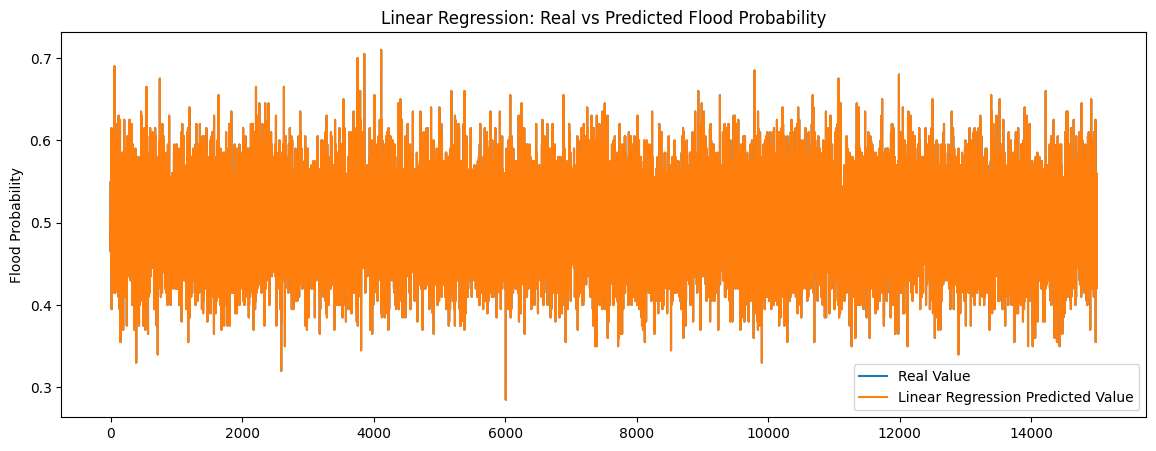

In [270]:
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Real Value')  # Change color to blue
plt.plot(lr_preds, label='Linear Regression Predicted Value')  # Change color to red
plt.ylabel('Flood Probability')
plt.legend()
plt.title('Linear Regression: Real vs Predicted Flood Probability')
plt.show()


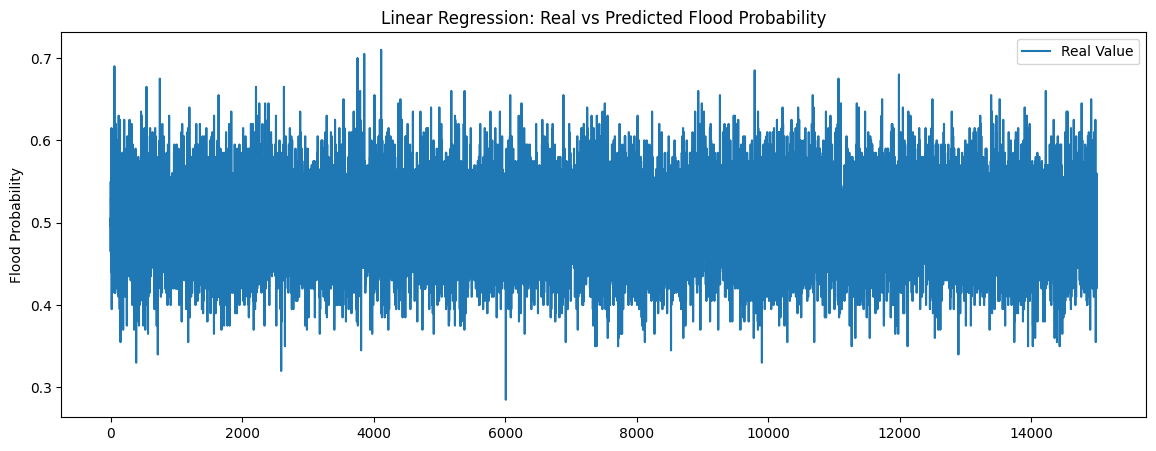

In [271]:
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Real Value')  # Change color to blue
plt.ylabel('Flood Probability')
plt.legend()
plt.title('Linear Regression: Real vs Predicted Flood Probability')
plt.show()

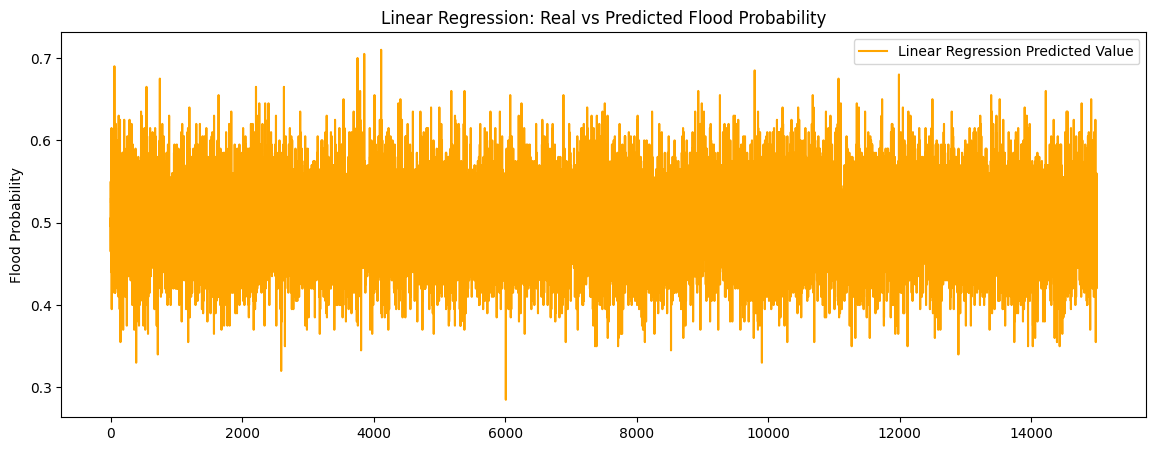

In [272]:
plt.figure(figsize=(14, 5))
plt.plot(lr_preds, label='Linear Regression Predicted Value', color='orange')  # Change color to red
plt.ylabel('Flood Probability')
plt.legend()
plt.title('Linear Regression: Real vs Predicted Flood Probability')
plt.show()

### SVR

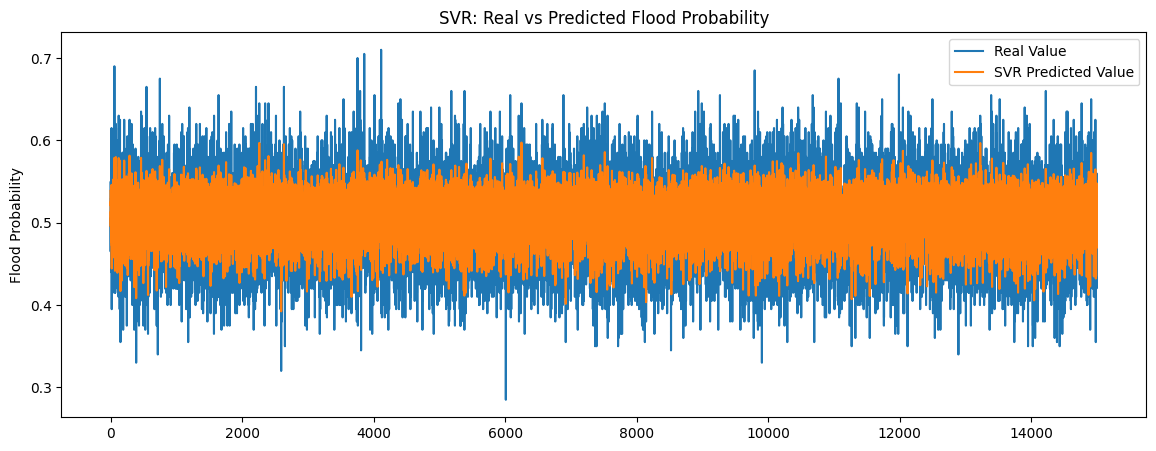

In [273]:
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Real Value')
plt.plot(svr_preds, label='SVR Predicted Value')
plt.ylabel('Flood Probability')
plt.legend()
plt.title('SVR: Real vs Predicted Flood Probability')
plt.show()


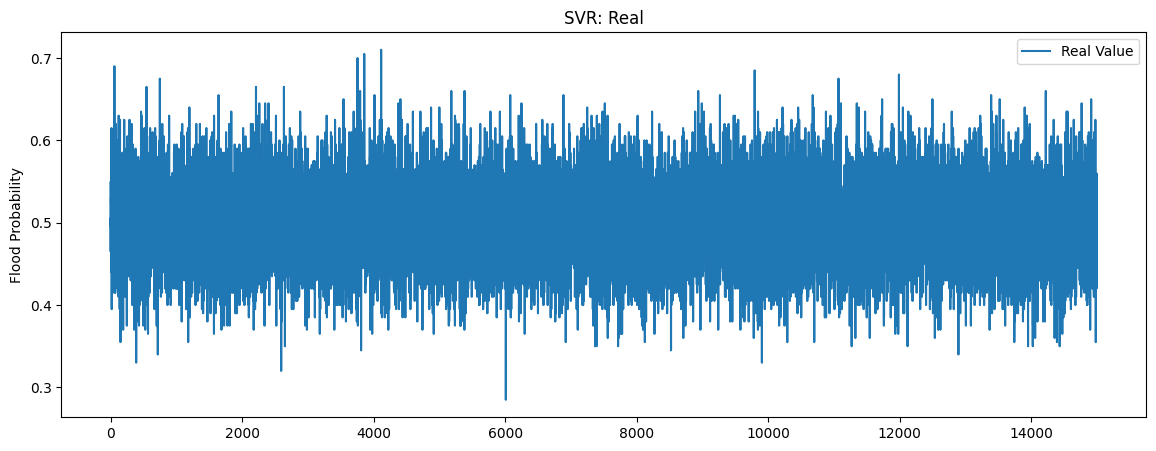

In [274]:
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Real Value')
plt.ylabel('Flood Probability')
plt.legend()
plt.title('SVR: Real')
plt.show()


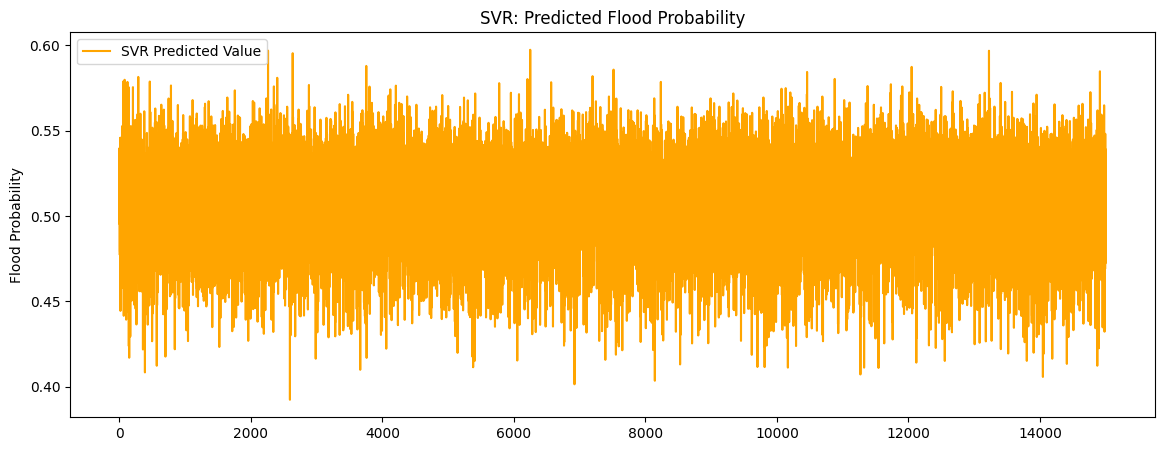

In [275]:
plt.figure(figsize=(14, 5))
plt.plot(svr_preds, label='SVR Predicted Value', color='orange')  # Change color to red
plt.ylabel('Flood Probability')
plt.legend()
plt.title('SVR: Predicted Flood Probability')
plt.show()


### Decision  Tree

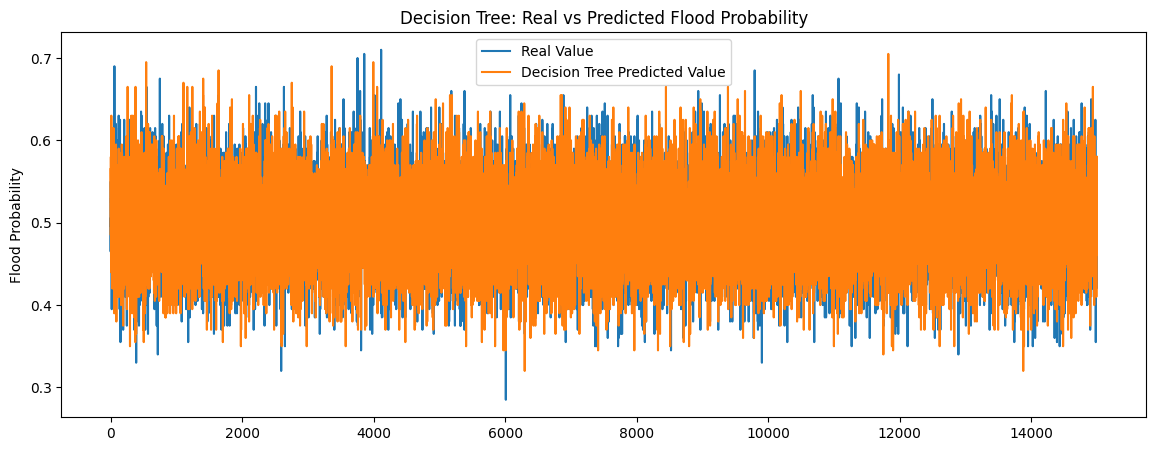

In [276]:
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Real Value')
plt.plot(dt_preds, label='Decision Tree Predicted Value')
plt.ylabel('Flood Probability')
plt.legend()
plt.title('Decision Tree: Real vs Predicted Flood Probability')
plt.show()


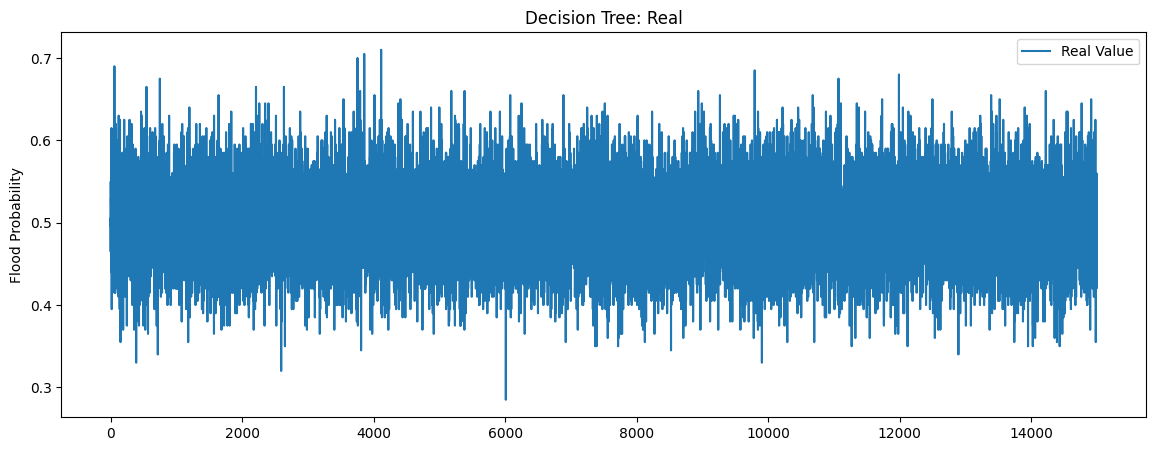

In [277]:
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Real Value')
plt.ylabel('Flood Probability')
plt.legend()
plt.title('Decision Tree: Real')
plt.show()


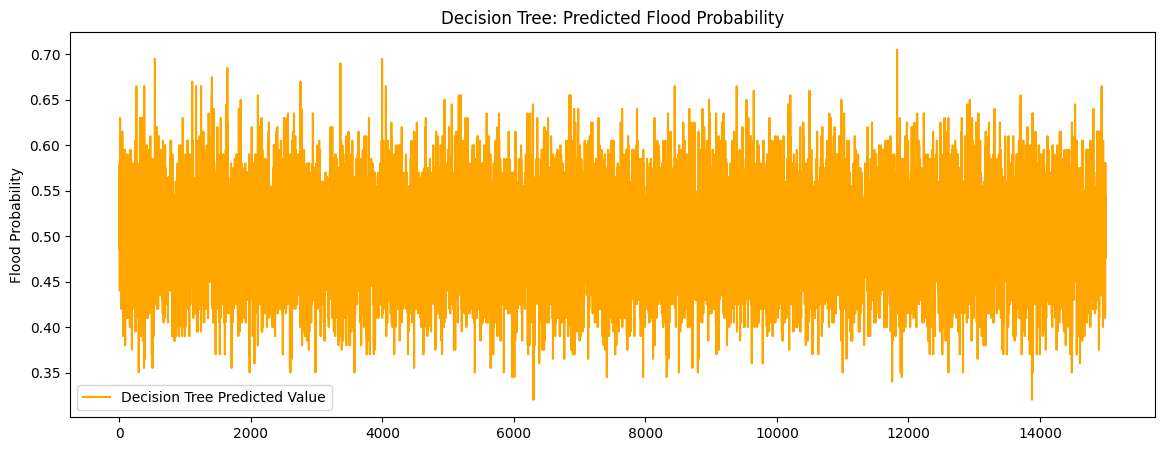

In [278]:
plt.figure(figsize=(14, 5))
plt.plot(dt_preds, label='Decision Tree Predicted Value', color='orange')
plt.ylabel('Flood Probability')
plt.legend()
plt.title('Decision Tree: Predicted Flood Probability')
plt.show()


###  MLP

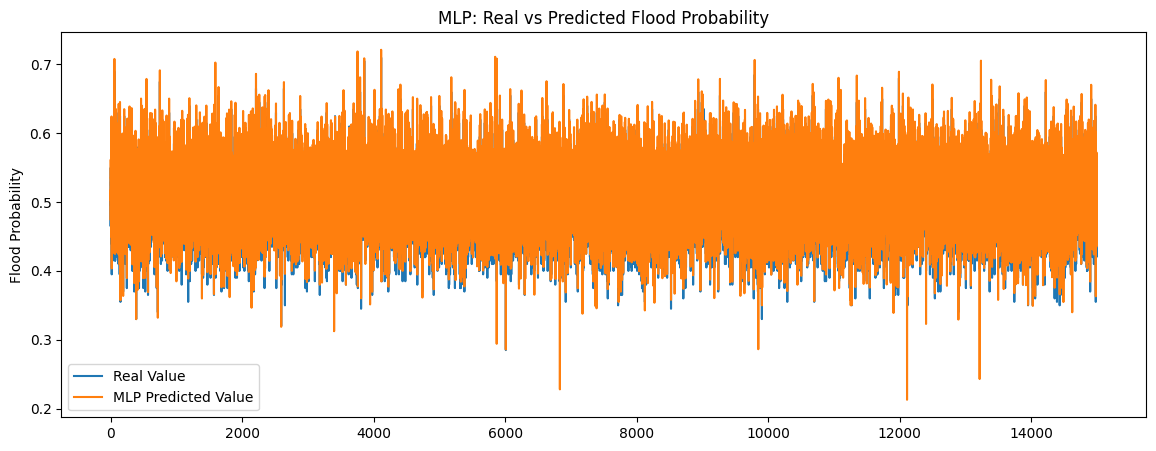

In [279]:
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Real Value')
plt.plot(mlp_preds, label='MLP Predicted Value')
plt.ylabel('Flood Probability')
plt.legend()
plt.title('MLP: Real vs Predicted Flood Probability')
plt.show()


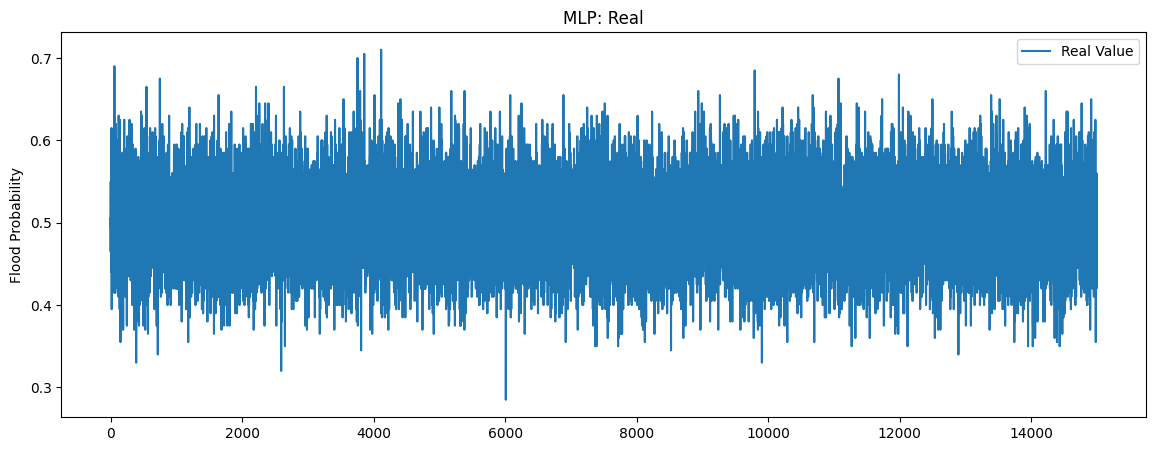

In [280]:
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Real Value')
plt.ylabel('Flood Probability')
plt.legend()
plt.title('MLP: Real')
plt.show()


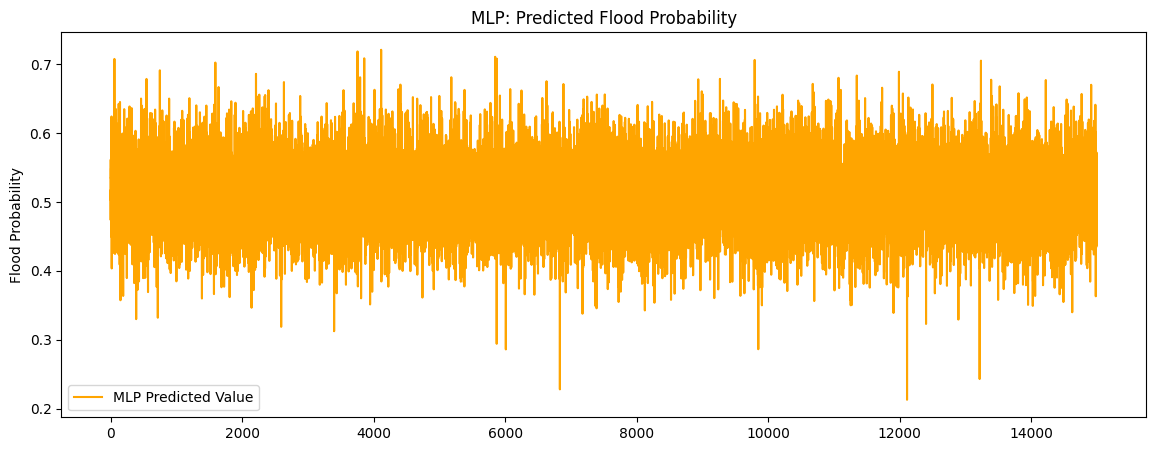

In [281]:
plt.figure(figsize=(14, 5))
plt.plot(mlp_preds, label='MLP Predicted Value', color='orange')
plt.ylabel('Flood Probability')
plt.legend()
plt.title('MLP: Predicted Flood Probability')
plt.show()


### All Models Prediction

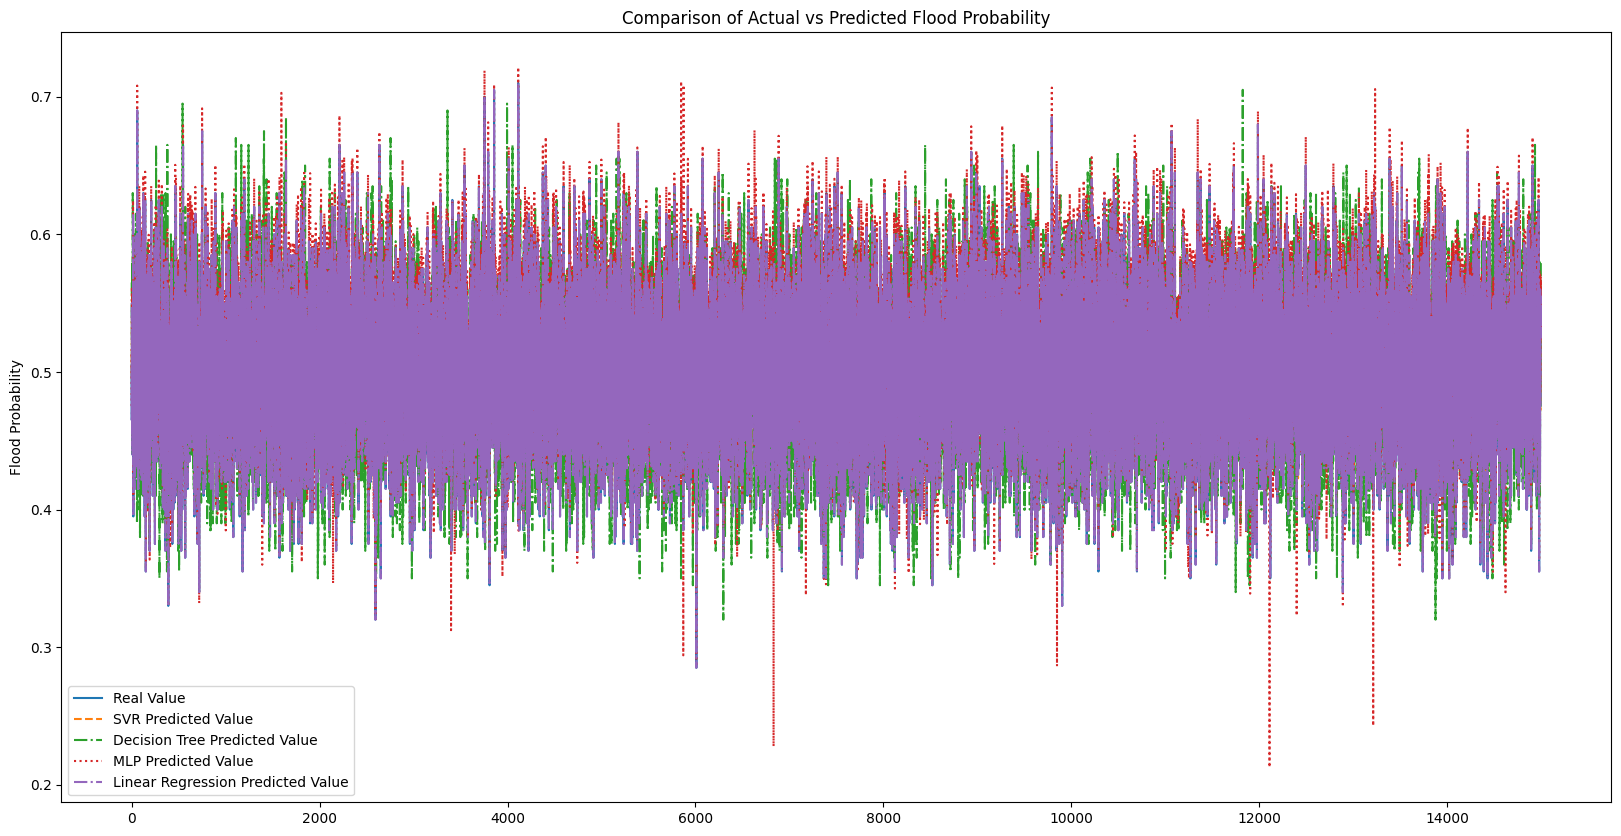

In [282]:
plt.figure(figsize=(20, 10))

# Plot actual values
plt.plot(y_test.values, label='Real Value')

# Plot predictions for SVR
plt.plot(svr_preds, label='SVR Predicted Value', linestyle='dashed')

# Plot predictions for Decision Tree
plt.plot(dt_preds, label='Decision Tree Predicted Value', linestyle='dashdot')

# Plot predictions for MLP
plt.plot(mlp_preds, label='MLP Predicted Value', linestyle='dotted')

# Plot predictions for Linear Regression
plt.plot(lr_preds, label='Linear Regression Predicted Value', linestyle='-.')

plt.ylabel('Flood Probability')
plt.legend()
plt.title('Comparison of Actual vs Predicted Flood Probability')
plt.show()


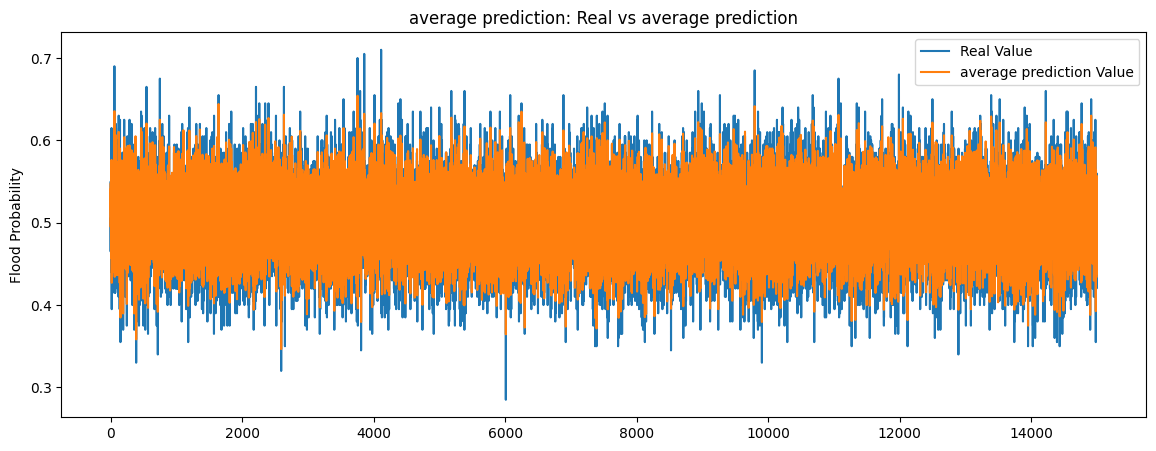

In [283]:
plt.figure(figsize=(14, 5))
plt.plot(y_test.values, label='Real Value')
plt.plot(average_prediction, label='average prediction Value')
plt.ylabel('Flood Probability')
plt.legend()
plt.title('average prediction: Real vs average prediction')
plt.show()

# Save models

In [284]:
import joblib

# Save trained models
joblib.dump(svr_model, 'svr_model.pkl')
joblib.dump(dt_model, 'dt_model.pkl')
joblib.dump(mlp_model, 'mlp_model.pkl')
joblib.dump(lr_model, 'lr_model.pkl')


['lr_model.pkl']

# load models

In [285]:

# Load saved models (when you need to make predictions)
svr_model = joblib.load('svr_model.pkl')
dt_model = joblib.load('dt_model.pkl')
mlp_model = joblib.load('mlp_model.pkl')
lr_model = joblib.load('lr_model.pkl')


#  Prediction in another data

In [286]:
# Load the provided data
data = {
    'MonsoonIntensity': [3],
    'TopographyDrainage': [8],
    'RiverManagement': [6],
    'Deforestation': [6],
    'Urbanization': [4],
    'ClimateChange': [4],
    'DamsQuality': [6],
    'Siltation': [2],
    'AgriculturalPractices': [3],
    'Encroachments': [2],
    'IneffectiveDisasterPreparedness': [5],
    'DrainageSystems': [10],
    'CoastalVulnerability': [7],
    'Landslides': [4],
    'Watersheds': [2],
    'DeterioratingInfrastructure': [3],
    'PopulationScore': [4],
    'WetlandLoss': [3],
    'InadequatePlanning': [2],
    'PoliticalFactors': [6]
}

In [287]:
input_data = pd.DataFrame(data)

In [288]:
svr_prediction = svr_model.predict(input_data)
dt_prediction = dt_model.predict(input_data)
mlp_prediction = mlp_model.predict(input_data)
lr_prediction = lr_model.predict(input_data)

In [289]:
# Print predictions
print("SVR Prediction:", svr_prediction)
print("Decision Tree Prediction:", dt_prediction)
print("MLP Prediction:", mlp_prediction)
print("Linear Regression Prediction:", lr_prediction)

SVR Prediction: [0.4805088]
Decision Tree Prediction: [0.43]
MLP Prediction: [0.45638744]
Linear Regression Prediction: [0.45]
